# Overview:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Oftentimes, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed to. <br>

[Dataset](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

In [1]:
# Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import re

In [2]:
# Load the dataset.

df = pd.read_csv('~/src/data/u1CapstoneData/bank/bank.csv', sep =';')
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [3]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [10]:
# Editing the dataframe for regression plots.

def yes(y):
    output = ''
    if y == 'no':
        output = 0
    else:
        output = 1
    return output

df['Yes'] = df['y'].apply(lambda x: yes(x))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,big_balance,Yes
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,True,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,True,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,False,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,True,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,False,0


In [11]:
def no(y):
    output = ''
    if y == 'yes':
        output = 0
    else:
        output = 1
    return output

df['No'] = df['y'].apply(lambda x: no(x))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,big_balance,Yes,No
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,True,0,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,True,0,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,False,0,1
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,True,0,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,False,0,1


### Let's explore our client's backgrounds.

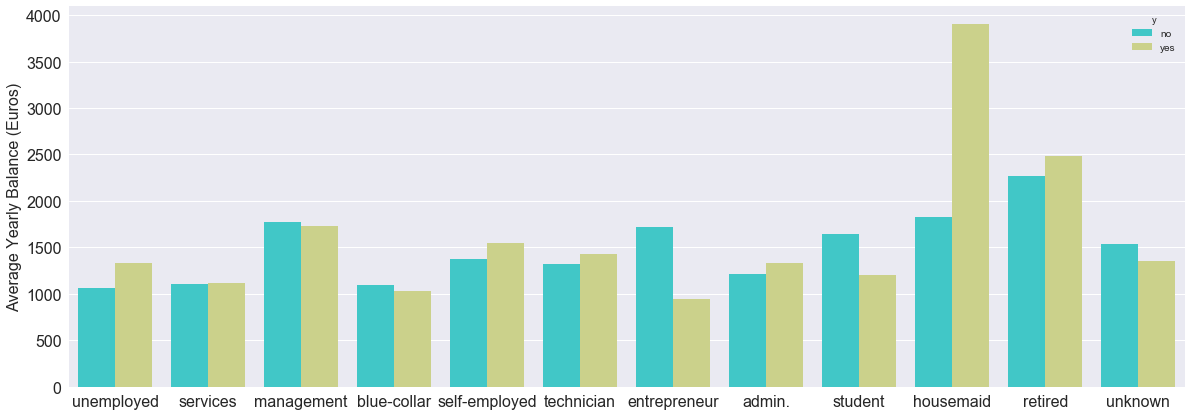

In [38]:
sns.set(style='darkgrid')
plt.figure(figsize=(20, 7))
ax = sns.barplot(x='job', y='balance', hue='y', data=df, ci=None, capsize=.2, palette='rainbow')
ax.tick_params(labelsize=16)
ax.set_xlabel('')
ax.set_ylabel('Average Yearly Balance (Euros)', size=16)
plt.show()

Retirees, housemaids, management, entrepreneur, and students have on average, the highest yearly bank balance.

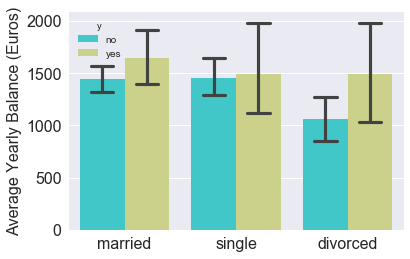

In [40]:
ax = sns.barplot(x='marital', y='balance', hue='y', data=df, ci=95, capsize=.2, palette='rainbow')
ax.tick_params(labelsize=16)
ax.set_xlabel('')
ax.set_ylabel('Average Yearly Balance (Euros)', size=16)
plt.show()

Divorcees on average, have a lower yearly balance. Single and married groups have similar average yearly balances however, there is more variation for the single group.

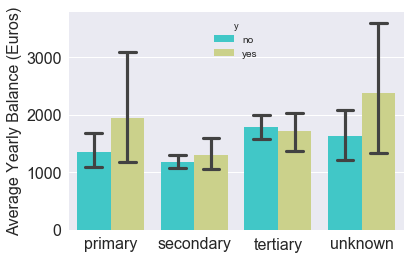

In [14]:
ax = sns.barplot(x='education', y='balance', hue='y', data=df, ci=95, capsize=.2, palette='rainbow')
ax.tick_params(labelsize=16)
ax.set_xlabel('')
ax.set_ylabel('Average Yearly Balance (Euros)', size=16)
plt.show()

Tertiary & unknown education groups have the highest average yearly balance. As expected, there is more variation within the unknown group than tertiary. Interestingly, clients with secondary education have the lowest average yearly balance.

Text(0.5,0,'Age')

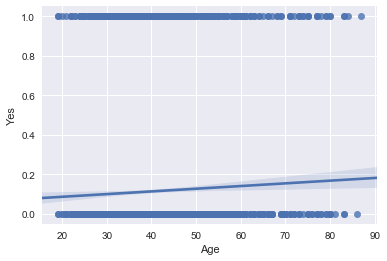

In [50]:
g = sns.regplot(x='age', y='Yes', data=df)
g.set_xlabel('Age')

Positive relationship between clients subscribing & age of the client.

Text(0.5,1,'Average Bank Balance & Clients Decision to Subscribe')

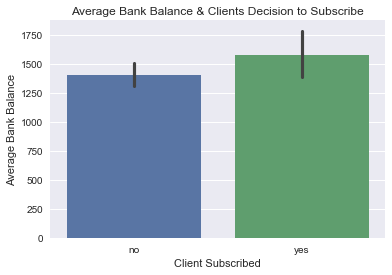

In [15]:
g = sns.barplot(y='balance', x='y', data=df)
g.set_xlabel('Client Subscribed')
g.set_ylabel('Average Bank Balance')
g.set_title('Average Bank Balance & Clients Decision to Subscribe')

Text(0.5,0,'Average Balance > 1400 Euros')

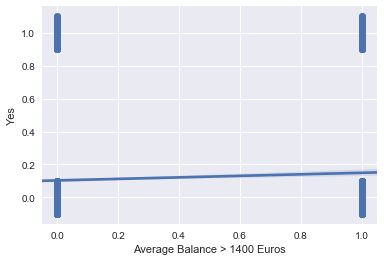

In [16]:
df['big_balance'] = df.balance > 1400
g = sns.regplot(x='big_balance', y='Yes', data=df, y_jitter=0.1)
g.set_xlabel('Average Balance > 1400 Euros')

Clients who subscribed have on average, a higher annual bank balance. Let's dive a little deeper to see if personal & home loans had any effect on their decision.

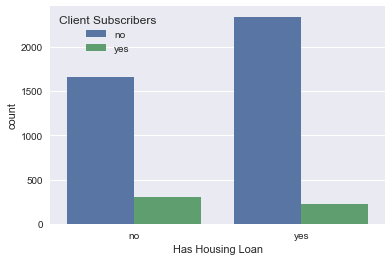

In [17]:
g = sns.countplot(x='housing', hue='y', data=df)
g.set_xlabel('Has Housing Loan')
plt.legend(title='Client Subscribers')

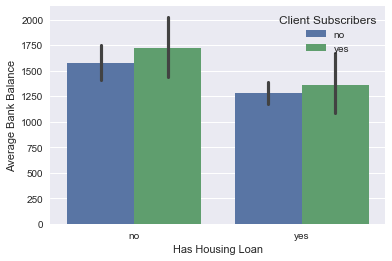

In [18]:
g = sns.barplot(x='housing', y='balance', hue='y', data=df)
g.set_xlabel('Has Housing Loan')
g.set_ylabel('Average Bank Balance')
plt.legend(loc='best', title='Client Subscribers')

Clients whom have taken out housing loans have on average, a lower average bank balance.

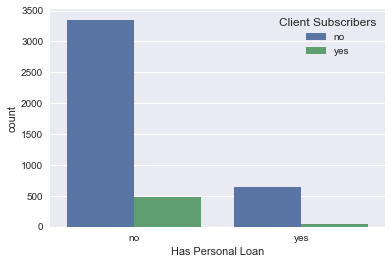

In [19]:
g = sns.countplot(x='loan', hue='y', data=df)
g.set_xlabel('Has Personal Loan')
plt.legend(loc='best', title='Client Subscribers')

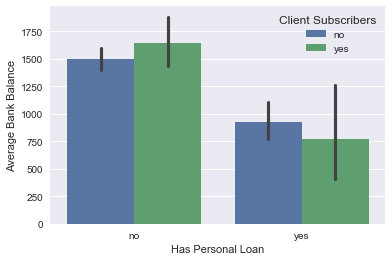

In [20]:
g = sns.barplot(x='loan', y='balance', hue='y', data=df)
g.set_xlabel('Has Personal Loan')
g.set_ylabel('Average Bank Balance')
plt.legend(loc='best', title='Client Subscribers')

As with home loans, those with personal loans have a lower average annual bank balance. There is more variability in average balance for clients with personal loans. Unlike a home loan, those who subscribed and have a personal loan have a lower average balance. 

### Marketing Campaign

In [21]:
print('Clients who subscribed to a term deposit:', len(df[df.y == 'yes']))
print('Did not subscribe to a term deposit:', len(df[df.y == 'no']))
print('success rate %:', len(df[df.y == 'yes'])/len(df[df.y == 'no']))

Clients who subscribed to a term deposit: 521
Did not subscribe to a term deposit: 4000
success rate %: 0.13025


13% of the bank's clients subscribed to the loan upon the completion of the last marketing campaign.

Text(0,0.5,'')

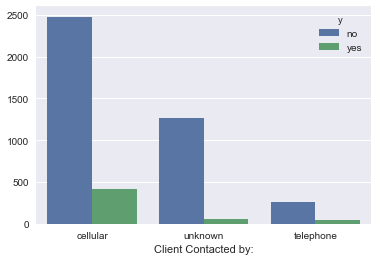

In [42]:
g = sns.countplot(x='contact', hue='y', data=df)
g.set_xlabel('Client Contacted by:')
g.set_ylabel('')

Text(0.5,1,'Clients Yes/No Subscribing: Day of Month')

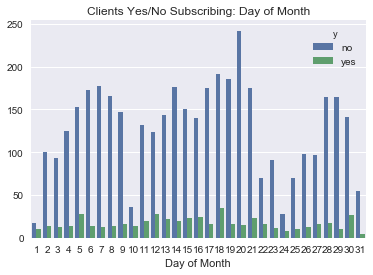

In [41]:
g = sns.countplot(x='day', hue='y', data=df)
g.set_xlabel('Day of Month')
g.set_ylabel('')
g.set_title('Clients Yes/No Subscribing: Day of Month')

Text(0.5,0,'Day of Month')

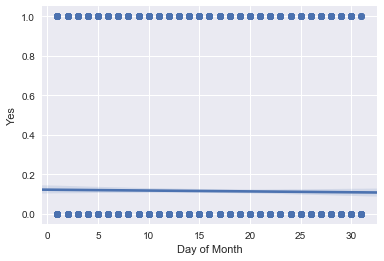

In [55]:
g = sns.regplot(x='day', y='Yes', data=df)
g.set_xlabel('Day of Month')

Text(0.5,1,'Clients Yes/No Subscribing by Month')

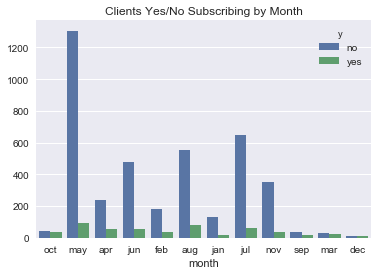

In [44]:
g = sns.countplot(x='month', hue='y', data=df)
g.set_ylabel('')
g.set_title('Clients Yes/No Subscribing by Month')

Text(0,0.5,'Client Subscribed Numerical')

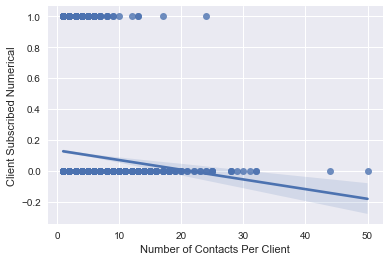

In [25]:
g = sns.regplot(x='campaign', y='Yes', data=df, truncate=True)
g.set_xlabel('Number of Contacts Per Client')
g.set_ylabel('Client Subscribed Numerical')

Contacts to clients after the 20th call have little to no effect, thus the marketing department shouldn't pursue further attempts after the 2oth call. 

Text(0.5,0,'Last Contact Duration (Seconds)')

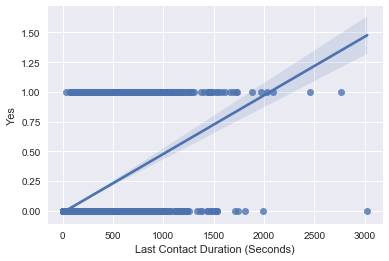

In [46]:
g = sns.regplot(x='duration', y='Yes', data=df, truncate=True)
g.set_xlabel('Last Contact Duration (Seconds)')

### Economic Indicators

In [27]:
econ = pd.read_csv('~/src/data/u1CapstoneData/bank-additional/bank-additional.csv', sep = ';')
econ.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


This is an additional dataset to the study & includes economic indicators at the time of client contact. 

In [28]:
econ['Yes'] = econ['y'].apply(lambda x: yes(x))
econ['No'] = econ['y'].apply(lambda x: no(x))

Text(0,0.5,'Consumer Price Index')

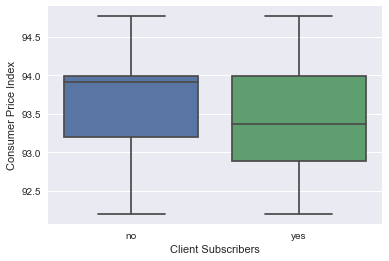

In [29]:
g = sns.boxplot(x='y', y='cons.price.idx', data=econ)
g.set_xlabel('Client Subscribers')
g.set_ylabel('Consumer Price Index')

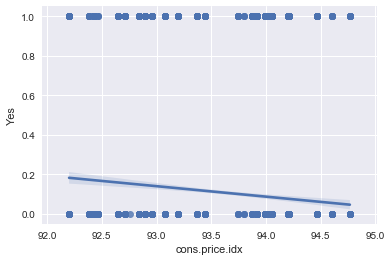

In [30]:
g = sns.regplot(x='cons.price.idx', y='Yes', data=econ, truncate=True)

A higher consumer price index appears to deter clients from subscribing to the loan.

Text(0,0.5,'Change in Consumer Confidence Index')

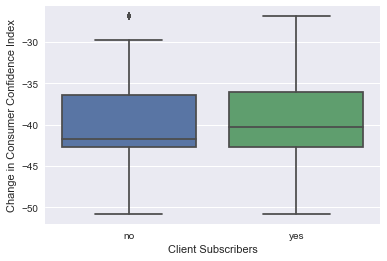

In [31]:
g = sns.boxplot(x='y', y='cons.conf.idx', data=econ)
g.set_xlabel('Client Subscribers')
g.set_ylabel('Change in Consumer Confidence Index')

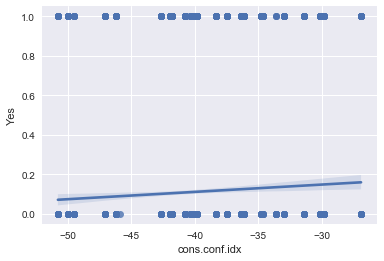

In [32]:
g = sns.regplot(x='cons.conf.idx', y='Yes', data=econ, truncate=True)

As the consumer confidence index falls, it is less likely that a client would subscribe to the loan.

Text(0,0.5,'Euro-Interbank Offer Rate')

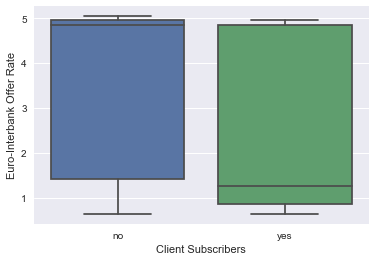

In [33]:
g = sns.boxplot(x='y', y='euribor3m', data=econ)
g.set_xlabel('Client Subscribers')
g.set_ylabel('Euro-Interbank Offer Rate')

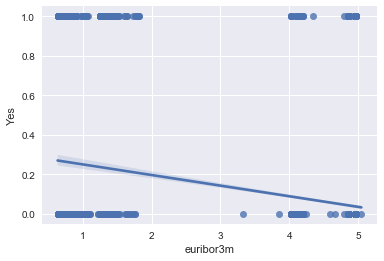

In [34]:
g = sns.regplot(x='euribor3m', y='Yes', data=econ, truncate=True)

A lower Euribor 3-month rate corresponds to a higher probability for a subscription.

# The Problem
We have been tasked by the marketing department of a commercial bank to create a plan to increase subscribers to their long-term deposit product. We have a dataset spanning May 2008 to October 2010, consisting of 4521 clients. During this campaign period, 521 clients ended up subscribing to the new product amounting to a success rate of 13%. The marketing department wants to improve this rate going forward during their subsequent campaigns when advertising the same long-term deposit product.
<br>
# The Potential Solution
I propose the marketing department implement a client-selection system based on demographic & financial filters to increase their success rate. These filters include: Average bank balance > 1400 euros; during periods of higher-than-average consumer price & confidence levels within the overall economy, lower-than-average 3-month-interbank-offer rates; target managers, retirees, and entrepreneurs; clients with primary & tertiary education levels; and older clients. Additionally, the marketing department should limit their attempts to contact each client to no more than 20 attempts. At the beginning of the campaign, we will split the total number of clients for an A/B test. The marketing department will not use client-filters on the control group & Group B will use the filter system. New client additions during the testing period will be randomly placed on an even basis into control and test group. The campaign will last 1 year. 
<br>
# Evaluation Plan
A t-test will be conducted between the client sign-up rate of the test group (client-selection filters) and the sign-up rate of the control group (no client-selection filters). If the sign up rate of the test group has a statistically significant positive difference than the control, then the experiment will be a success. If significant, we will recommend the filter system continue to be implemented in future marketing campaigns. If the t-value is not significant, then the marketing department will repeat the test during year 2, adjusting filters as needed. These include lowering contact attempts to < 15 attempts as well as adjustments to the filter based on overall economic indicators (Euribor 3-month rate/Consumer Confidence Index). If the t-value is not significant for year 2, we will try again during a third campaign in year 3. If the t-value is not siginificant for all 3 years, we will not consider the experiment to be a success. In future years & campaigns, it would be suggested we implement a client-loyalty program, offering incentives & rewards to clients who subscribe to the loan, depending on the most-likely subscribers or a general offer to all clients. The marketing department's campaign effiency is a secondary metric, as more investment is required as the department increases its telemarketing calls. This provides value through expense reduction as less calls are made to each client, while still conversing with a larger pool of clients with greater potential to ultimately choosing "yes" to subscribe.